# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.497  1  0.668 0.415 0.003   
                             age        0.109  1  0.147 0.702 0.001   
                             Kiel       2.582  1  3.475 0.064 0.018   
                             Magdeburg  5.998  1  8.070 0.005 0.041   
                             Sweden     9.103  1 12.248 0.001 0.060   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.831  1  0.882 0.349 0.005   
                             age        1.923  1  2.041 0.155 0.011   
                             Kiel       0.037  1  0.039 0.844 0.000   
                             Magdeburg  1.207  1  1.281 0.259 0.007   
                             Sweden    18.013  1 19.117 0.000 0.091   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.382  0.574    False  
                             age               0.154  0.806    False  
                             Kiel              1.195  0.148    False  
                             Magdeburg         2.302  0.019     True  
                             Sweden            3.237  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.457  0.511    False  
                             age               0.810  0.289    False  
                             Kiel              0.074  0.906    False  
                             Magdeburg         0.587  0.417    False  
                             Sweden            4.695  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.646  1  4.118 0.044 0.021   
                             age        0.023  1  0.149 0.700 0.001   
                             Kiel       0.446  1  2.843 0.093 0.015   
                             Magdeburg  0.916  1  5.842 0.017 0.030   
                             Sweden     2.409  1 15.358 0.000 0.074   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.849  1  1.451 0.230 0.008   
                             age        1.960  1  0.998 0.319 0.005   
                             Kiel       9.886  1  5.035 0.026 0.026   
                             Magdeburg 15.772  1  8.033 0.005 0.040   
                             Sweden     0.409  1  0.208 0.649 0.001   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.358  0.102    False  
                             age               0.155  0.797    False  
                             Kiel              1.030  0.187    False  
                             Magdeburg         1.780  0.047     True  
                             Sweden            3.907  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.639  0.370    False  
                             age               0.496  0.469    False  
                             Kiel              1.585  0.067    False  
                             Magdeburg         2.294  0.018     True  
                             Sweden            0.188  0.759    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.415         0.382  0.574    False   
                             age       0.702         0.154  0.806    False   
                             Kiel      0.064         1.195  0.148    False   
                             Magdeburg 0.005         2.302  0.019     True   
                             Sweden    0.001         3.237  0.003     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.349         0.457  0.511    False   
                             age       0.155         0.810  0.289    False   
                             Kiel      0.844         0.074  0.906    False   
                             Magdeburg 0.259         0.587  0.417    False   
                             Sweden    0.000         4.695  0.000     True   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.044         1.358  0.102    False  
                             age       0.700         0.155  0.797    False  
                             Kiel      0.093         1.030  0.187    False  
                             Magdeburg 0.017         1.780  0.047     True  
                             Sweden    0.000         3.907  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.230         0.639  0.370    False  
                             age       0.319         0.496  0.469    False  
                             Kiel      0.026         1.585  0.067    False  
                             Magdeburg 0.005         2.294  0.018     True  
                             Sweden    0.649         0.188  0.759    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.259         2.489     0.336     0.245         2.732     0.312
std       0.301         5.347     0.328     0.297         5.146     0.325
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.338     0.015     0.002         0.357     0.007
50%       0.125         0.904     0.249     0.094         1.027     0.188
75%       0.460         2.412     0.613     0.439         2.731     0.586
max       1.000       142.364     1.000     0.999        86.657     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.415         0.382   
A0A024R0T9;K7ER74;P02655                           AD     0.043         1.371   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.098         1.007   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.527         0.278   
A0A075B6H7                                         AD     0.271         0.567   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.059         1.229   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.493         0.307   
S4R3U6                                             AD     0.349         0.457   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.574    False   
A0A024R0T9;K7ER74;P02655                           AD      0.107    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.208    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.672    False   
A0A075B6H7                                         AD      0.430    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.140    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.183    False   
Q9Y6Y9                                             AD      0.644    False   
S4R3U6                                             AD      0.511    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.044         1.358   
A0A024R0T9;K7ER74;P02655                           AD     0.031         1.510   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.252         0.599   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.293         0.533   
A0A075B6H7                                         AD     0.245         0.611   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.049         1.313   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.796         0.099   
S4R3U6                                             AD     0.230         0.639   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.102    False  
A0A024R0T9;K7ER74;P02655                           AD      0.077    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.396    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.442    False  
A0A075B6H7                                         AD      0.388    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.247         1.411     0.329     0.249         1.485     0.323
std       0.287         1.615     0.313     0.288         1.770     0.314
min       0.000         0.001     0.000     0.000         0.003     0.000
25%       0.012         0.365     0.038     0.009         0.356     0.029
50%       0.118         0.928     0.239     0.116         0.936     0.221
75%       0.431         1.932     0.590     0.441         2.030     0.587
max       0.997        21.555     0.998     0.994        24.762     0.996

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1021,996


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.415         0.382  0.574   
A0A024R0T9;K7ER74;P02655                           0.043         1.371  0.107   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.098         1.007  0.208   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.527         0.278  0.672   
A0A075B6H7                                         0.271         0.567  0.430   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.059         1.229  0.140   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.183   
Q9Y6Y9                                             0.493         0.307  0.644   
S4R3U6                                             0.349         0.457  0.511   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.044   
A0A024R0T9;K7ER74;P02655                              False 0.031   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.252   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.293   
A0A075B6H7                                            False 0.245   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.049   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.796   
S4R3U6                                                False 0.230   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.358  0.102   
A0A024R0T9;K7ER74;P02655                                   1.510  0.077   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.599  0.396   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.533  0.442   
A0A075B6H7                                                 0.611  0.388   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.303   
Q9Y6X5                                                     1.313  0.111   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.171   
Q9Y6Y9                                                     0.099  0.867   
S4R3U6                                                     0.639  0.370   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    957
PI (yes) - QRILC (yes)   361
PI (no)  - QRILC (yes)    64
PI (yes) - QRILC (no)     39
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A075B6I0                                         0.030         1.529  0.081   
A0A075B7B8                                         0.015         1.824  0.047   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2              0.014         1.850  0.045   
A0A087WWT2;Q9NPD7                                  0.034         1.468  0.091   
A0A087WXB8;Q9Y274                                  0.012         1.932  0.038   
...                                                  ...           ...    ...   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI... 0.001         2.926  0.006   
Q9UKB5                                             0.013         1.880  0.042   
Q9UNW1                                             0.006         2.207  0.023   
Q9UQ52                                             0.116         0.935  0.237   
Q9Y653;Q9Y653-2;Q9Y653-3                           0.013         1.872  0.043   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A075B6I0                                            False 0.002   
A0A075B7B8                                             True 0.301   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2                  True 0.058   
A0A087WWT2;Q9NPD7                                     False 0.005   
A0A087WXB8;Q9Y274                                      True 0.115   
...                                                     ...   ...   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...     True 0.025   
Q9UKB5                                                 True 0.018   
Q9UNW1                                                 True 0.212   
Q9UQ52                                                False 0.010   
Q9Y653;Q9Y653-2;Q9Y653-3                               True 0.190   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A075B6I0                                                 2.808  0.006   
A0A075B7B8                                                 0.522  0.450   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2                      1.239  0.127   
A0A087WWT2;Q9NPD7                                          2.281  0.018   
A0A087WXB8;Q9Y274                                          0.940  0.220   
...                                                          ...    ...   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...         1.595  0.066   
Q9UKB5                                                     1.734  0.051   
Q9UNW1                                                     0.674  0.349   
Q9UQ52                                                     2.002  0.031   
Q9Y653;Q9Y653-2;Q9Y653-3                                   0.721  0.321   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A075B6I0                                             True       194  
A0A075B7B8                                            False        57  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2                 False       114  
A0A087WWT2;Q9NPD7                                      True       193  
A0A087WXB8;Q9Y274                                     False        89  
...                                                     ...       ...  
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...    False       115  
Q9UKB5                                                False       148  
Q9UNW1                                                False       171  
Q9UQ52                               

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.574,0.102,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.107,0.077,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.208,0.396,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.672,0.442,196,PI (no) - QRILC (no)
A0A075B6H7,0.430,0.388,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.316,0.303,197,PI (no) - QRILC (no)
Q9Y6X5,0.140,0.111,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.183,0.171,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P43004;P43004-2;P43004-3,0.980,0.027,89,PI (no) - QRILC (yes),0.954
J3KSJ8;Q9UD71;Q9UD71-2,0.867,0.002,51,PI (no) - QRILC (yes),0.866
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.876,0.028,86,PI (no) - QRILC (yes),0.848
O95881,0.889,0.047,67,PI (no) - QRILC (yes),0.842
K7EIS2;K7EKV3;K7EM70;K7EQL9;Q9BSG5;Q9BSG5-2;Q9BSG5-3,0.038,0.785,71,PI (yes) - QRILC (no),0.747
...,...,...,...,...,...
H3BUV8;Q08397,0.044,0.052,157,PI (yes) - QRILC (no),0.008
Q7Z7H5;Q7Z7H5-3,0.049,0.056,176,PI (yes) - QRILC (no),0.008
P37802;P37802-2;X6RJP6,0.046,0.051,110,PI (yes) - QRILC (no),0.005


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


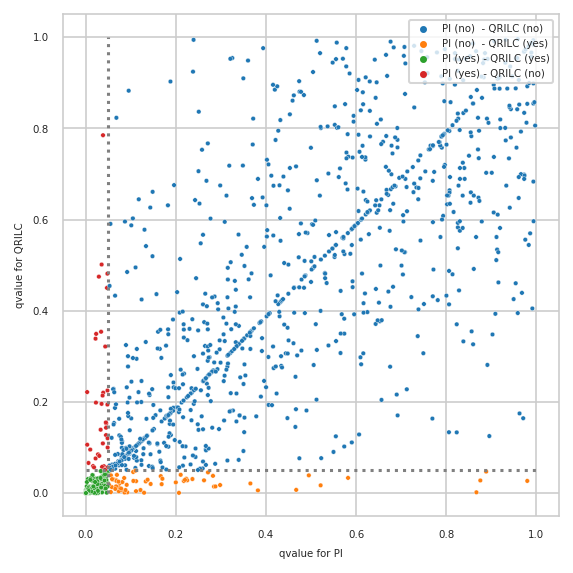

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


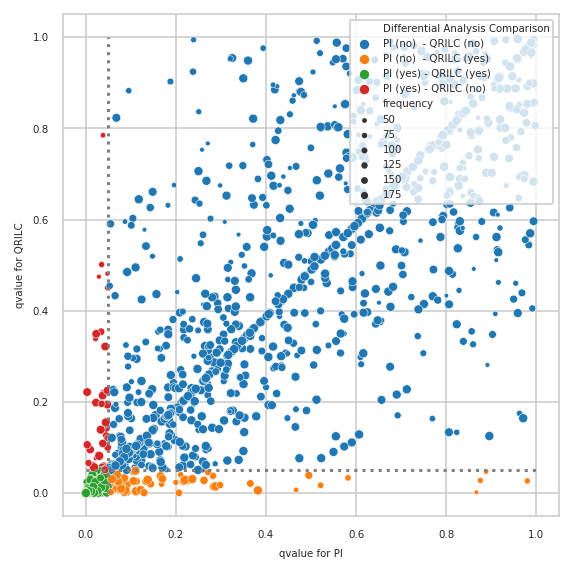

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out